# Exercises for EBT517E - Week 1

## Number of states of an ideal gas

The number of states between energy $E$ and $E+\rm{d}E$ is useful to calculate thermodynamic averages. 

In order to count the number of states with energy less than $E$, let's introduce the dimensionless parameter

$$ R^2 = \left(\frac{2L}{h}\right)^2 (2mE) $$

and calculate the number of states with 

$$\Gamma(R) < \sum_{\{n_i\}}^\prime \Theta\left(R^2-\sum_{i=1}^D n_i^2\right)$$

where $n_i$ with $i={1,2,...,D}$ are positive integers not all equal to zero. 

In [43]:
import numpy as np

In [68]:
def Γ2D(R):
    nmax = np.int(R)

    narray = np.arange(nmax)

    nmeshx, nmeshy = np.meshgrid(narray,narray)
    R2 = R**2
    
    return np.sum(nmeshx**2+nmeshy**2<=R2) #-1?
 
def Γ2Dsc(R):
    return np.pi*R**2/4

In [69]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of States in 2D')

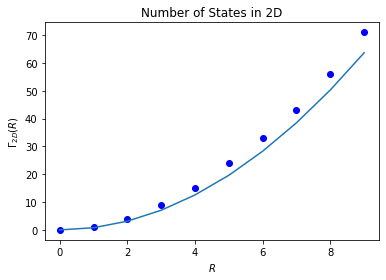

In [70]:
Rmax= 10
Rarray = np.arange(Rmax)

for R in Rarray:
    plt.plot(R, Γ2D(R), 'bo' )
    
plt.plot(Rarray,Γ2Dsc(Rarray),'-')
plt.xlabel(r'$R$')
plt.ylabel(r'$Γ_{2D}(R)$')
plt.title('Number of States in 2D')

### Questions:

- Does the asymptotic semiclassical expression for under or over estimate the actual number of states?

- What is the minimum value of $R$ such that the difference between the actual and the asymptotic expression for the number of states is less than 1%?

### Exercise: Write a general program to calculate the above in $D=1,2,3$ dimensions.

## Chemical potential of a "classical" ideal gas

Let us calculate the chemical potential numerically when the quantum distribution function approaches the Maxwell-Boltzmann distribution. 

The number equation is given by 

$$ N = \int_0^\infty n_\mathrm{MB}(\epsilon) g(\epsilon) \mathrm{d}\epsilon 
     = \frac{V (2m)^{3/2}}{2\pi^2\hbar^3}  \int_0^\infty \frac{\epsilon^{1/2}}{\mathrm{e}^{\beta(\epsilon-\mu)}} \mathrm{d}\epsilon $$

where $\beta=1/k_\mathrm{B}T$ is the inverse temperature. (Compare to Maxwell-Boltzmann speed distribution.) 

Although we can solve for $\mu$ above (exercise), let's take the above equation as a root finding problem for $\mu$ and in the homework you will generalize this to a fermi gas ($n_\mathrm{MB} \to n_\mathrm{FD}$). 

First, let's introduce dimensionless variables. If we scale energy in units of $k_\mathrm{B}T$ such that $\beta\epsilon=x$, then

$$ N = \frac{V (2m)^{3/2}}{2\pi^2\hbar^3\beta^{3/2}}  \int_0^\infty \frac{x^{1/2}}{\rm{e}^{x-\tilde{\mu}}} \mathrm{d}x $$

In terms of the thermal de Broglie wave length 
$$\lambda_\mathrm{th}=\sqrt{\frac{2\pi \hbar^2}{m k_\rm{B}T}}$$
we have
$$ n\lambda_\mathrm{th}^3 = \tilde{n} = \int_0^\infty \frac{x^{1/2}}{\rm{e}^{x-\tilde{\mu}}} \mathrm{d}x $$

In [81]:
from scipy import integrate
from scipy import optimize

In [136]:
def nMB(x,μ):
    return 1/np.exp(x-μ)

def g3d(x):
    return np.sqrt(x)

def integrand(x,μ):
    return nMB(x,μ)*g3d(x)

def number_equation(μ, n, xmax=100): # arguments with default values
    return n-integrate.quad(integrand,0.,xmax,args=(μ,))[0] # passing arguments

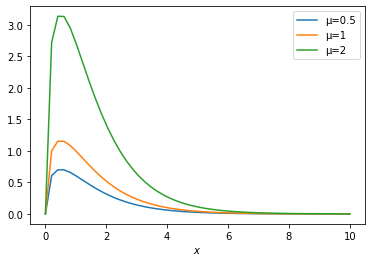

In [145]:
# plot the integrand

xarr, dx = np.linspace(0,10,retstep=True)

for μ in [0.5, 1, 2]:
    plt.plot(xarr, integrand(xarr,μ), '-',label=f'μ={μ}')
    
plt.xlabel(r'$x$')
plt.legend();

In [146]:
# test the number equation

n = 1.
μ = 1.2

# integrate using sum

np.sum(integrand(xarr,μ))*dx

2.879935585886554

In [147]:
integrate.quad(integrand,0.,np.inf,args=(μ,))

<ipython-input-136-4b16d5bfaa24>:2: RuntimeWarning: overflow encountered in exp
  return 1/np.exp(x-μ)


(2.942377012583316, 3.013858940192904e-09)

In [148]:
number_equation(μ, n)

-1.942377012580426

In [121]:
# solve for chemical potential 
optimize.root(lambda x: number_equation(x, n), x0=μ)

    fjac: array([[-1.]])
     fun: 4.440892098500626e-16
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.68309811e-12])
       r: array([1.00000002])
  status: 1
 success: True
       x: array([0.12078224])

In [267]:
# calculate the chemical potential for a fixed density as a function of temperature

nval = 1 

Tarr = np.linspace(0.1,1)

μarr = []
for T in Tarr:
    λth = np.sqrt(1/T)
    n = nval*λth**3
    sol = optimize.root(lambda x: number_equation(x, n), x0=2)
    #print(T,sol['x'])
    x0 = sol['x']
    μarr.append(x0*T)


Text(0.5, 1.0, 'classical ideal gas')

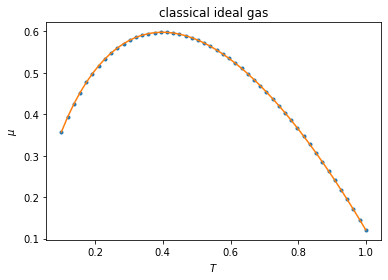

In [266]:
plt.plot(Tarr, μarr, '.')

plt.plot(Tarr,  Tarr*np.log( nval* (1/Tarr)**1.5 * 2/ np.sqrt(np.pi) ) ) # Γ(3/2) = sq(2)/2

plt.xlabel(r'$T$')
plt.ylabel(r'$\mu$')
plt.title(r'classical ideal gas')

# Homework 1

1. Calculate the Fermi energy numerically using an electron dispersion $\epsilon_\sigma(k)$ and for a given number of particles $N_\sigma$.

2. Find the temperature dependence of $\mu(N,T)$ and energy per particle $e(T)$ for a fermi gas.

3. Write a numerical program which yields the shape of the Fermi surface of a given electron dispersion in $2D$.